In [1]:
import os
import time
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
import sys, time, os, warnings
import numpy as np
import pandas as pd
from collections import Counter 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")

In [2]:
## The location of the Flickr8K_ images
Flickr_jpg_dir = "Flickr8k_Dataset/Flicker8k_Dataset/"
## The location of the caption file
Flickr_text_dir = "Flickr8k_text/Flickr8k.token.txt"

jpgs = os.listdir(Flickr_jpg_dir)
print("The number of jpg flies in Flicker8k: {}".format(len(jpgs)))

The number of jpg flies in Flicker8k: 8091


In [3]:
def load_csv(directory):
    desc = dict()
    text = pd.read_csv(directory, delimiter = '|', header = None, names = ["filename","index","caption"])
    text = text.iloc[1:,:]
    df_new = text[text.iloc[:,2].notnull()]
    print(df_new.iloc[:5,:])
    return df_new

In [4]:
file = open(Flickr_text_dir,'r') # Opening File
text = file.read() # Reading File
file.close() # Closing File
datatxt = []
for line in text.split('\n'): # Loop runs for No. of Images present
    col = line.split('\t') # Splits into 2 tuples on basis of '\t'
    if len(col) == 1:
        continue
    w = col[0].split("#") # Splits 1st tuple on basis of '#'
    datatxt.append(w + [col[1].lower()])
df_txt_flickr = pd.DataFrame(datatxt,columns=["filename","index","caption"])
uni_filenames = np.unique(df_txt_flickr.filename.values)  # uni_filenames stores unique file name e.g. '1000268201_693b08cb0e.jpg'
print("Total no. of Unique File Names: {}".format(len(uni_filenames)))

Total no. of Unique File Names: 8092


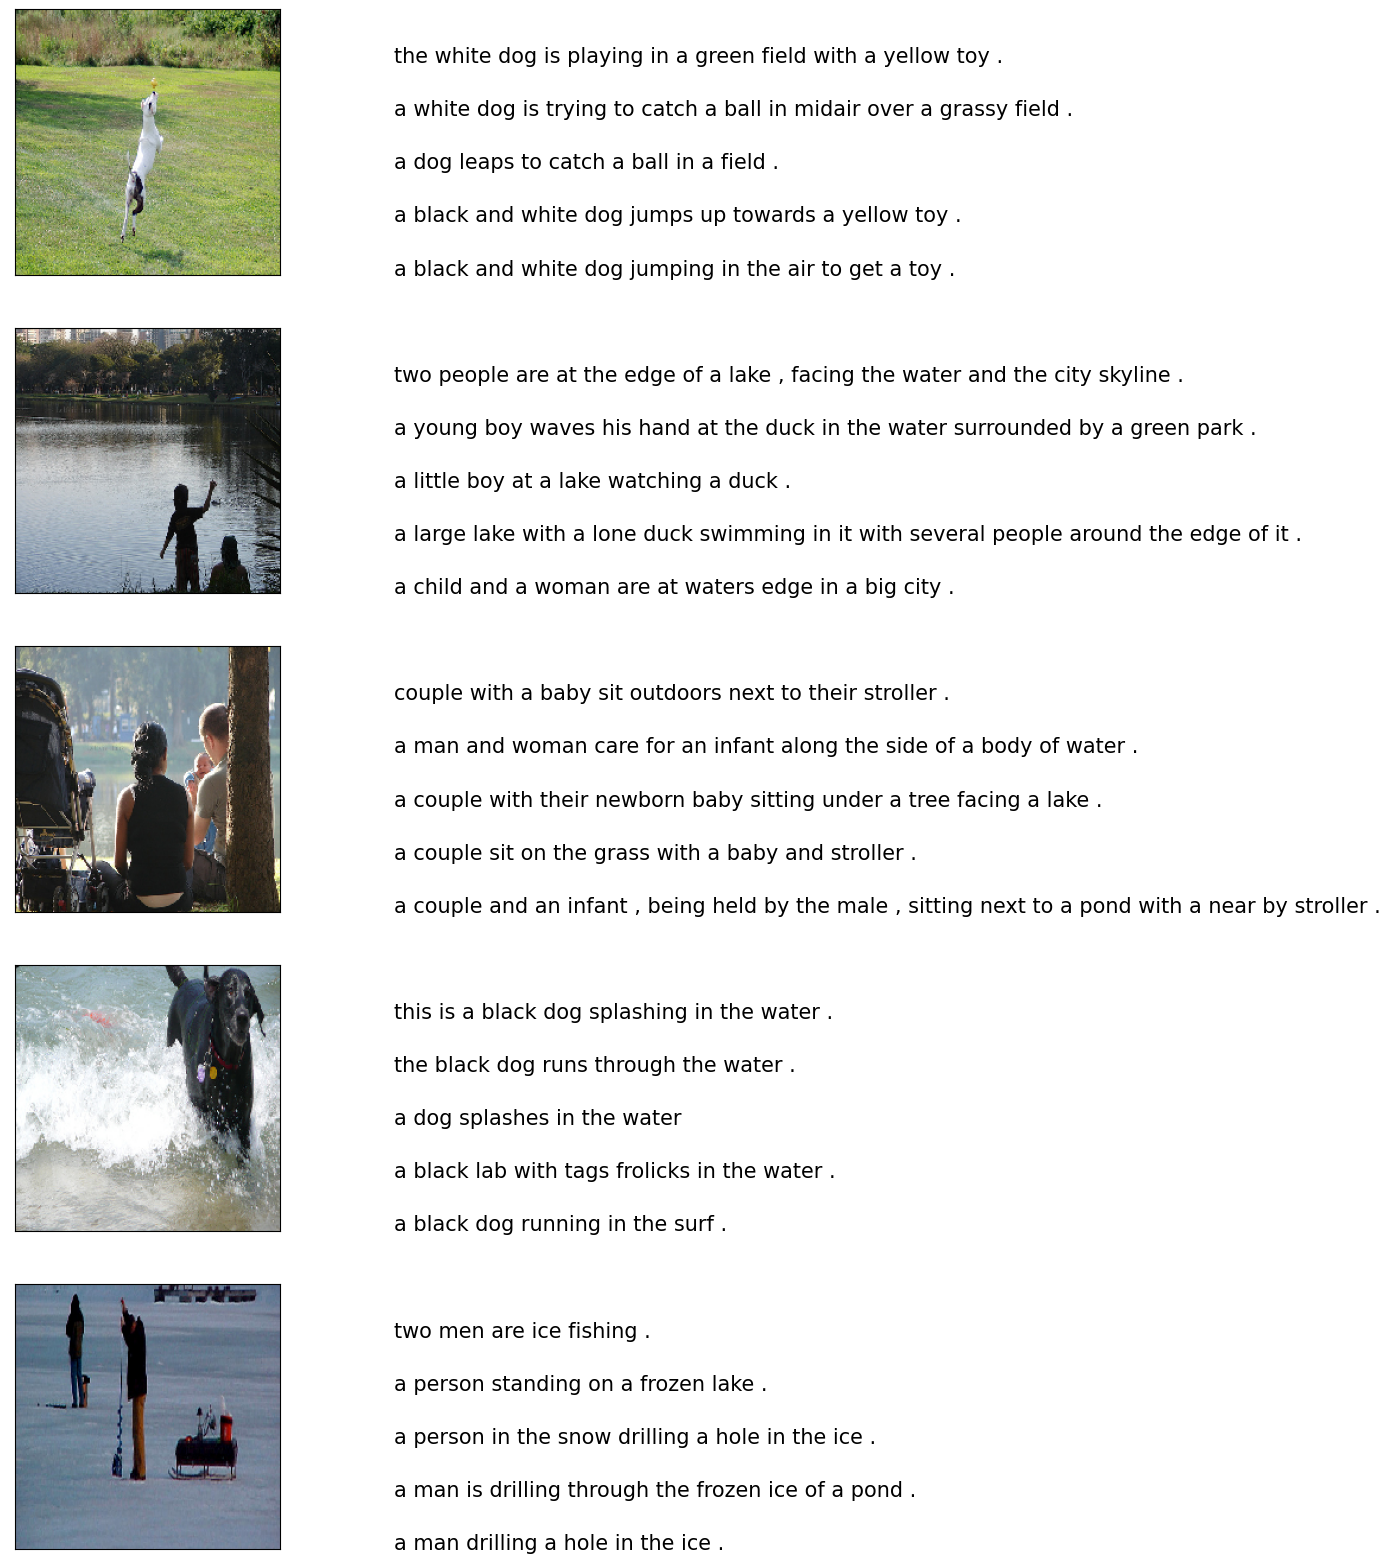

In [5]:
npic = 5  # No. of Pictures
npix = 224  # No. of Pixels
target_size = (npix, npix, 3)  # Target Size of Image (224, 224, 3)
count = 1
fig = plt.figure(figsize=(10,20))  # To Plot the Image
for jpgfnm in uni_filenames[15:15+npic]:  # Taking random 5 images of Dataset
    filename = Flickr_jpg_dir + '/' + jpgfnm  # Constructing file name
    captions = list(df_txt_flickr["caption"].loc[df_txt_flickr["filename"]==jpgfnm].values)  # Finding Captions where filename matches 'jpgfnm'
    image_load = load_img(filename, target_size=target_size)  # Loads image with size as target_size
    
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load) # To print the Image
    count += 1
    ax = fig.add_subplot(npic,2,count)
    plt.axis('off') # To put the axis 'off'
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,len(captions))
    for i, caption in enumerate(captions):
        ax.text(0,i,caption,fontsize=15)
    count += 1
plt.show()

In [6]:
def df_word(df_txt_flickr):
    vocabulary = []  # Declared an empty list vocabulary 
    for i in range(len(df_txt_flickr)):
        temp = df_txt_flickr.iloc[i,2]  #.iloc[] is from 0 to length-1 & [ ,2] is selcted for 'caption'
        vocabulary.extend(temp.split())
    print('Total Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame({"word":list(ct.keys()),"count":list(ct.values())})
    dfword = dfword.sort_values("count",ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt_flickr)
dfword.head(10)  # Returns top 5 Rows of dfword 

Total Vocabulary Size: 8918


word  count
0     a  62989
1     .  36581
2    in  18975
3   the  18419
4    on  10744
5    is   9345
6   and   8852
7   dog   8136
8  with   7765
9   man   7266

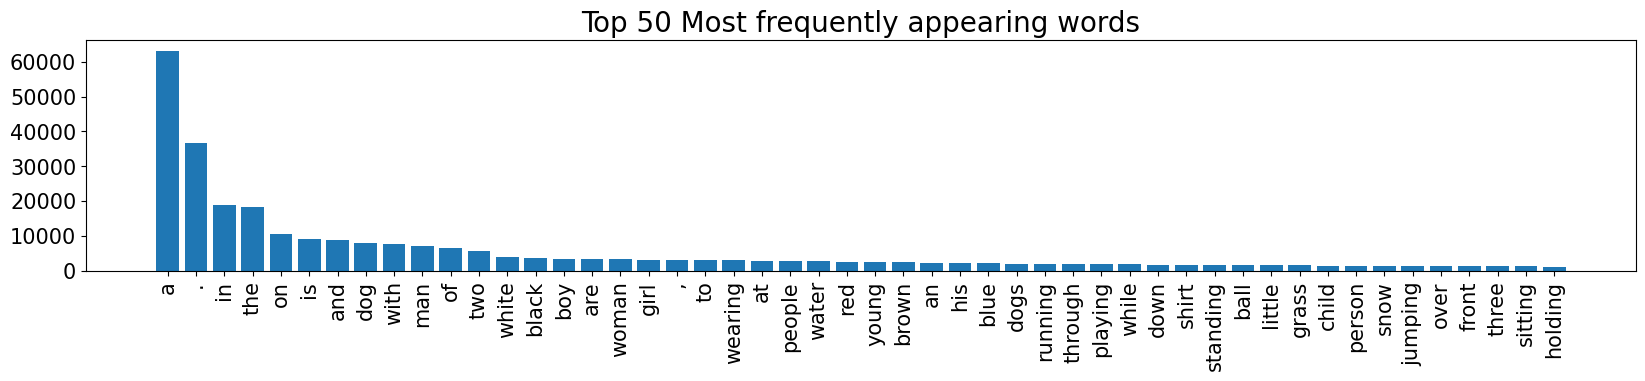

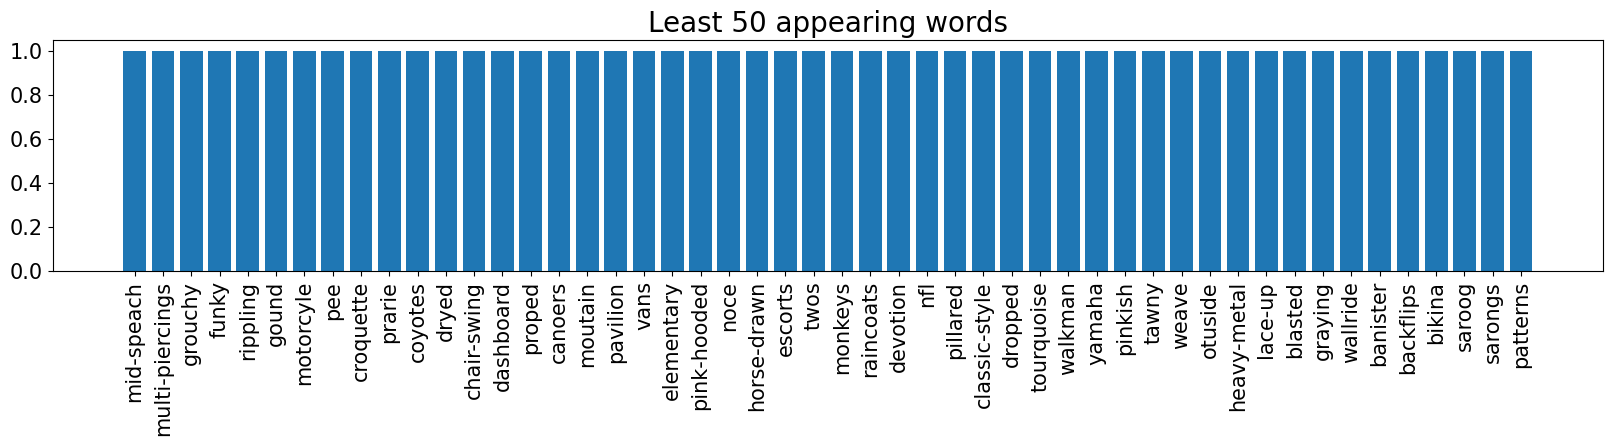

In [7]:
topn = 50  # Taking top 50 words
def plthist(dfsub, title):
    plt.figure(figsize=(20,3))
    plt.bar(dfsub.index,dfsub["count"])
    plt.yticks(fontsize=15)
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=15)
    plt.title(title,fontsize=20)
    plt.show()
plthist(dfword.iloc[:topn,:],title="Top 50 Most frequently appearing words")
plthist(dfword.iloc[-topn:,:],title="Least 50 appearing words")

In [8]:
#5.1 Removing Punctuations
import string
def remove_punctuation(text_original):
    text_no_punctuation = text_original.translate(str.maketrans('','',string.punctuation))
    return(text_no_punctuation)

In [9]:
#5.2 Removing Single Characters
def remove_single_character(text):
    text_len_more_than1 = ""
    for word in text.split():
        if len(word) > 1:
            text_len_more_than1 += " " + word
    return(text_len_more_than1)

In [10]:
#5.3 Removing Numeric Values from Captions
def remove_numeric(text,printTF=False):
    text_no_numeric = ""
    for word in text.split():
        isalpha = word.isalpha()
        if printTF:
            print("    {:10} : {:}".format(word,isalpha))
        if isalpha:
            text_no_numeric += " " + word
    return(text_no_numeric)

In [11]:
#5.4 Cleaning Data by Calling Above f(n)s
def text_clean(text_original):
    text = remove_punctuation(text_original)
    text = remove_single_character(text)
    text = remove_numeric(text)
    return(text)
for i, caption in enumerate(df_txt_flickr.caption.values): 
    # enumerate() Adds a counter to an iterable & returns it as enumerate object
    newcaption = text_clean(caption)
    if(i<10): # Printing the first 10 Captions for example
        print(newcaption)
    df_txt_flickr["caption"].iloc[i] = newcaption

 child in pink dress is climbing up set of stairs in an entry way
 girl going into wooden building
 little girl climbing into wooden playhouse
 little girl climbing the stairs to her playhouse
 little girl in pink dress going into wooden cabin
 black dog and spotted dog are fighting
 black dog and tricolored dog playing with each other on the road
 black dog and white dog with brown spots are staring at each other in the street
 two dogs of different breeds looking at each other on the road
 two dogs on pavement moving toward each other


Total Vocabulary Size: 8763


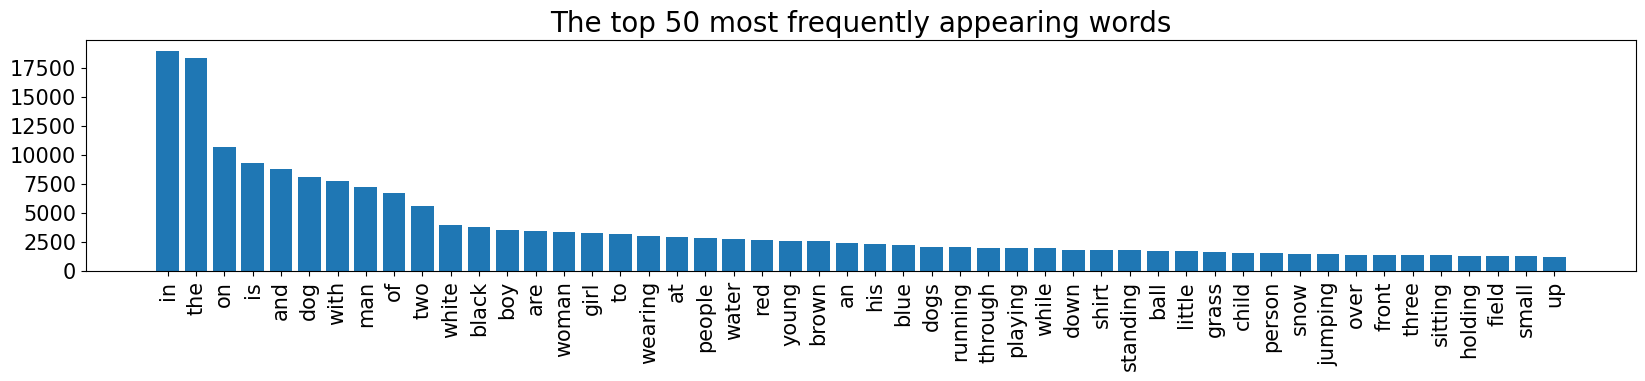

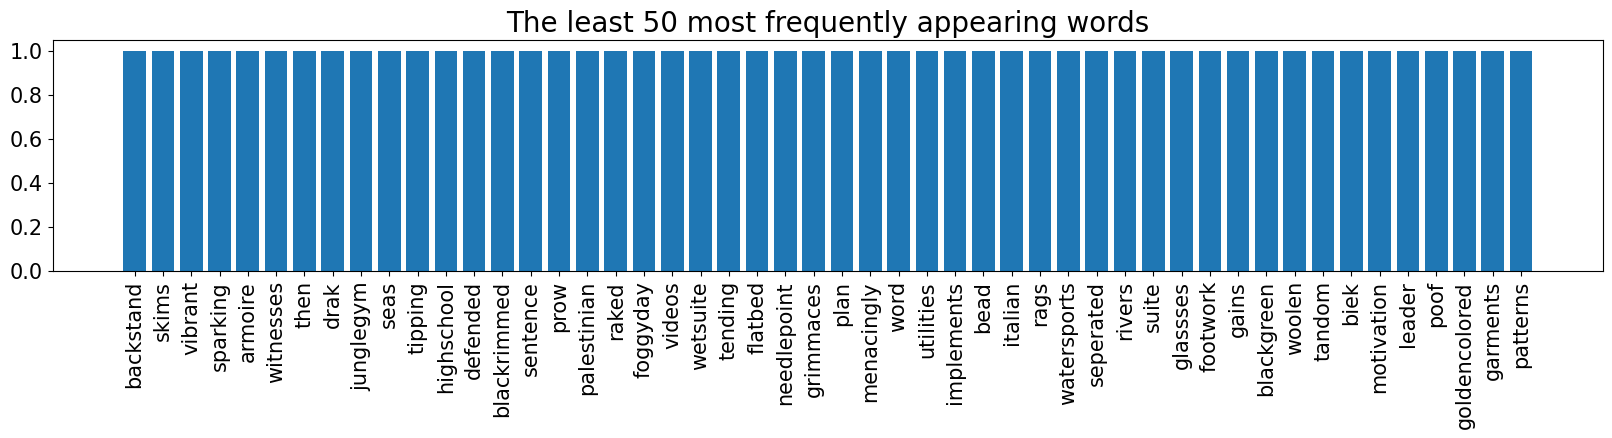

In [12]:
dfword = df_word(df_txt_flickr)
plthist(dfword.iloc[:topn,:],
        title="The top 50 most frequently appearing words")
plthist(dfword.iloc[-topn:,:],
        title="The least 50 most frequently appearing words")

In [13]:
#5.5 Adding 'startseq' & 'endseq' to captions
from copy import copy
def add_start_end_seq_token(captions):
    caps = []
    for txt in captions:
        txt = 'startseq ' + txt + ' endseq'  # Adding <startseq> and <endseq> to all captions
        caps.append(txt)
    return(caps)
df_txt_flickr0 = copy(df_txt_flickr)
df_txt_flickr0["caption"] = add_start_end_seq_token(df_txt_flickr["caption"])
df_txt_flickr0.head(5)
del df_txt_flickr

In [14]:
# Loading a text file into memory
def load_doc(filename):
    # Opening the file as read only
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

In [15]:
def load_photos(filename):
    file = load_doc(filename)
    photos = file.split("\n")[:-1]
    return photos
def load_clean_descriptions(filename, photos):   
    #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.split("\n"):
        
        words = line.split()
        if len(words)<1 :
            continue
    
        image, image_caption = words[0], words[1:]
        
        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = '<start> ' + " ".join(image_caption) + ' <end>'
            descriptions[image].append(desc)

    return descriptions

In [16]:
dataset_text = "Flickr8k_text"

In [17]:
filename = dataset_text + "/" + "Flickr_8k.trainImages.txt"

#train = loading_data(filename)
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions.txt", train_imgs)

In [18]:
#converting dictionary to clean list of descriptions
def dict_to_list(caps):
    all_desc = []
    for key in caps.keys():
        [all_desc.append(d) for d in caps[key]]
    return all_desc

#creating tokenizer class 
#this will vectorise text corpus
#each integer will represent token in dictionary 

from keras.preprocessing.text import Tokenizer

def create_tokenizer(caps):
    desc_list = dict_to_list(caps)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer

In [19]:
from pickle import dump, load
# give each word a index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer1.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size 

7577

In [20]:
from keras.applications import VGG16  # Importing VGG-16 Net from keras.applications
modelvgg = VGG16(include_top=True,weights=None)
modelvgg.load_weights("input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5") # Loading Pre-Trained Wts of VGG-16 on ImageNet
modelvgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
from keras import models
modelvgg.layers.pop()
modelvgg = models.Model(inputs=modelvgg.inputs, outputs=modelvgg.layers[-2].output) # Removing Last Layer of VGG-16 Pretrained Net
modelvgg.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [22]:
#8. Extracting Features from Flickr8k Images
from keras.applications.vgg16 import preprocess_input
from collections import OrderedDict

images = OrderedDict()  # To preserve the Order of Dictionary Keys
npix = 224  # No. of Pixels 
target_size = (npix,npix,3)  # Target Size of the Image
for i,name in enumerate(jpgs):
    filename = Flickr_jpg_dir + '/' + name  # Load an image from file
    image = load_img(filename, target_size=target_size)
    image = img_to_array(image)  # Convert the image pixels to a Numpy Array
    nimage = preprocess_input(image)
    y_pred = modelvgg.predict(nimage.reshape( (1,) + nimage.shape[:3])) 
    images[name] = y_pred.flatten()

1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 180ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 145ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 176ms/step


1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 307ms/step


In [23]:
#9. Data Preprocessing
dimages, keepindex = [],[]
nd=(df_txt_flickr0["index"].values)
b = [(int(i)==0) for i in nd]
df_txt_flickr0 = df_txt_flickr0.loc[df_txt_flickr0["index"].values == "0",: ]

for i, fnm in enumerate(df_txt_flickr0.filename):  # enumerate() adds a counter to an iterable & returns an enumerate object
    if fnm in images.keys():
        dimages.append(images[fnm])
        keepindex.append(i)
        
fnames = df_txt_flickr0["filename"].iloc[keepindex].values
dcaptions = df_txt_flickr0["caption"].iloc[keepindex].values
dimages = np.array(dimages)
print(df_txt_flickr0["index"][:5])

0     0
5     0
10    0
15    0
20    0
Name: index, dtype: object


In [24]:
#Using Tokenizer to change Character Vector to Integer Vector
from keras.preprocessing.text import Tokenizer
count_words=22000  # Maximum no. of words in dictionary 
# nb_words = 31782
tokenizer = Tokenizer(num_words=8000)
tokenizer.fit_on_texts(dcaptions)
vocab_size = len(tokenizer.word_index) + 1
print("vocabulary size : {}".format(vocab_size))
dtexts = tokenizer.texts_to_sequences(dcaptions)
print(dtexts[:5])

vocabulary size : 4476
[[1, 38, 3, 66, 144, 7, 124, 52, 406, 9, 367, 3, 24, 2351, 522, 2], [1, 12, 8, 5, 752, 8, 17, 368, 2], [1, 48, 15, 170, 3, 584, 101, 3, 41, 9, 551, 1198, 11, 55, 213, 3, 1076, 2], [1, 10, 621, 6, 150, 27, 23, 8, 101, 46, 112, 2], [1, 10, 3, 24, 82, 96, 1199, 19, 162, 2]]


In [25]:
#Splitting between Train, Validation & Test Sets
prop_test, prop_val = 0.2, 0.2 
N = len(dtexts)
Ntest, Nval = int(N*prop_test), int(N*prop_val)
def split_test_val_train(dtexts,Ntest,Nval):
    return(dtexts[:Ntest], dtexts[Ntest:Ntest+Nval],dtexts[Ntest+Nval:])
dt_test,  dt_val, dt_train   = split_test_val_train(dtexts,Ntest,Nval)
di_test,  di_val, di_train   = split_test_val_train(dimages,Ntest,Nval)
fnm_test,fnm_val, fnm_train  = split_test_val_train(fnames,Ntest,Nval)

In [26]:
#Finding Maximum Caption Length
maxlen = np.max([len(text) for text in dtexts])
print(maxlen)

30


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def preprocessing(dtexts,dimages):
    N = len(dtexts)
    print("# captions/images = {}".format(N))
    assert(N==len(dimages))
    Xtext, Ximage, ytext = [],[],[]
    for text,image in zip(dtexts,dimages):

        for i in range(1,len(text)):
            in_text, out_text = text[:i], text[i]
            in_text = pad_sequences([in_text],maxlen=maxlen).flatten()
            out_text = to_categorical(out_text,num_classes = vocab_size)
            Xtext.append(in_text)
            Ximage.append(image)
            ytext.append(out_text)

    Xtext  = np.array(Xtext)
    Ximage = np.array(Ximage)
    ytext  = np.array(ytext)
    print(" {} {} {}".format(Xtext.shape,Ximage.shape,ytext.shape))
    return(Xtext,Ximage,ytext)
Xtext_train, Ximage_train, ytext_train = preprocessing(dt_train,di_train)
Xtext_val,   Ximage_val,   ytext_val   = preprocessing(dt_val,di_val)

# captions/images = 4855
 (49631, 30) (49631, 4096) (49631, 4476)
# captions/images = 1618
 (16353, 30) (16353, 4096) (16353, 4476)


In [28]:
from keras import layers
print(vocab_size)  # Image feature

dim_embedding = 64
input_image = layers.Input(shape=(Ximage_train.shape[1],))
fimage = layers.Dense(256,activation='relu',name="ImageFeature")(input_image)

# Sequence model
input_txt = layers.Input(shape=(maxlen,))
ftxt = layers.Embedding(vocab_size,dim_embedding, mask_zero=True)(input_txt)
ftxt = layers.LSTM(256,name="CaptionFeature")(ftxt)

# Combined Model for Decoder
decoder = layers.add([ftxt,fimage])
decoder = layers.Dense(256,activation='relu')(decoder)
output = layers.Dense(vocab_size,activation='softmax')(decoder)
model = models.Model(inputs=[input_image, input_txt],outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam')
print(model.summary())

4476
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 64)       286464      ['input_3[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 CaptionFeature (LSTM)          (None, 256)          328704      ['embedding[0][0]']              
                                                                                       

In [29]:
#11. Training the LSTM Model
#The Model is trained on the Training Set with epochs = 5 & batch size = 64
start = time.time()
hist = model.fit([Ximage_train, Xtext_train], ytext_train, epochs=7, verbose=2, batch_size=64, validation_data=([Ximage_val, Xtext_val], ytext_val))
end = time.time()
print("TIME TOOK {:3.2f}MIN".format((end - start )/60))
print(Ximage_train.shape,Xtext_train.shape,ytext_train.shape)

Epoch 1/7
776/776 - 476s - loss: 5.3214 - val_loss: 4.7401 - 476s/epoch - 613ms/step
Epoch 2/7
776/776 - 423s - loss: 4.3138 - val_loss: 4.4542 - 423s/epoch - 545ms/step
Epoch 3/7
776/776 - 433s - loss: 3.8452 - val_loss: 4.3965 - 433s/epoch - 558ms/step
Epoch 4/7
776/776 - 434s - loss: 3.5144 - val_loss: 4.4345 - 434s/epoch - 559ms/step
Epoch 5/7
776/776 - 410s - loss: 3.2441 - val_loss: 4.5534 - 410s/epoch - 528ms/step
Epoch 6/7
776/776 - 397s - loss: 2.9823 - val_loss: 4.8221 - 397s/epoch - 512ms/step
Epoch 7/7
776/776 - 404s - loss: 2.7381 - val_loss: 5.0180 - 404s/epoch - 521ms/step
TIME TOOK 49.62MIN
(49631, 4096) (49631, 30) (49631, 4476)


In [30]:
model.save("model1/model_final1.h5")

Plotting Loss & Validation Loss:


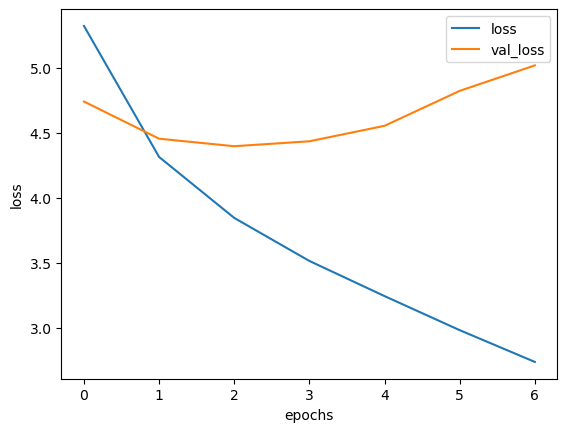

In [31]:
#12. Plotting Loss & Validation Loss
print('Plotting Loss & Validation Loss:')
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

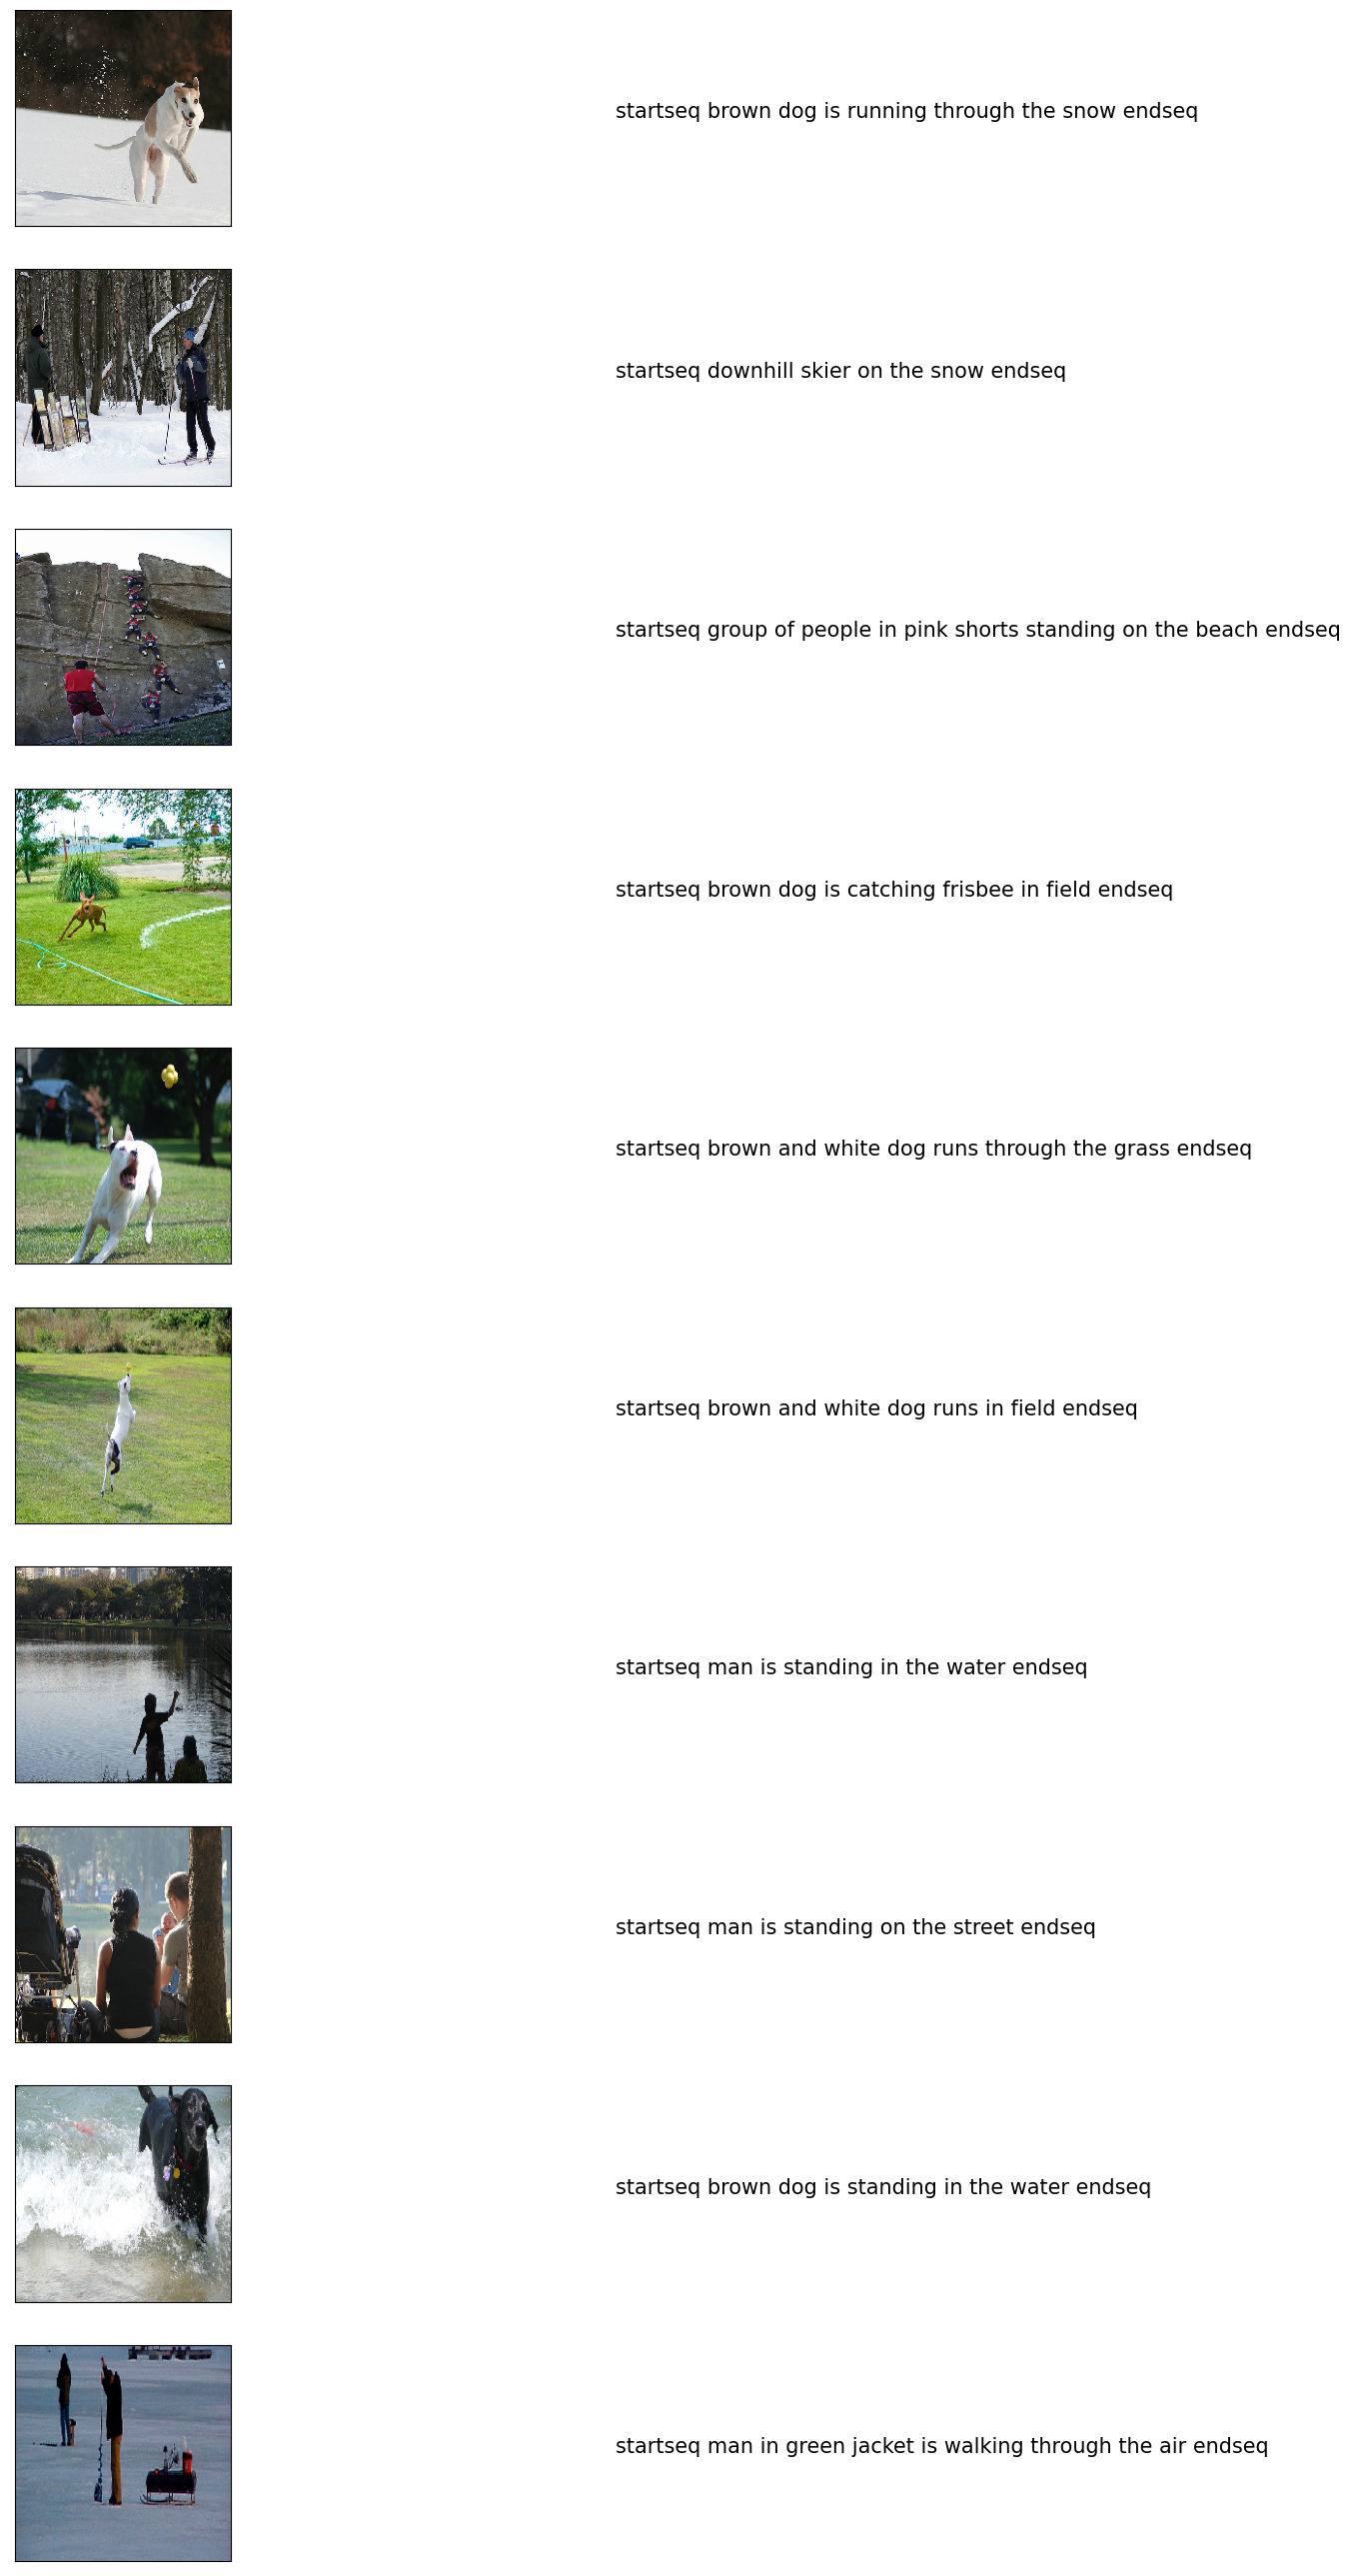

In [32]:
#13. Predicting Captions for Test Set
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])
def predict_caption(image):
    '''
    image.shape = (1,4462)
    '''

    in_text = 'startseq'
    for iword in range(maxlen):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence],maxlen)
        yhat = model.predict([image,sequence],verbose=0)
        yhat = np.argmax(yhat)
        newword = index_word[yhat]
        in_text += " " + newword
        if newword == "endseq":
            break
    return(in_text)

npic = 5
npix = 224
target_size = (npix,npix,3)
count = 1
fig = plt.figure(figsize=(20,50))
for jpgfnm, image_feature in zip(fnm_test[npic+5:npic+15],di_test[npic+5:npic+15]):
    
    filename = Flickr_jpg_dir + '/' + jpgfnm # Images
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic+10,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    caption = predict_caption(image_feature.reshape(1,len(image_feature))) # Captions
    ax = fig.add_subplot(npic+10,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=15)
    count += 1

plt.show()

In [33]:
#14. Finding BLEU Score
from nltk.tokenize import word_tokenize
from nltk.translate.bleu_score import sentence_bleu
index_word = dict([(index,word) for word, index in tokenizer.word_index.items()])

nkeep = 5
pred_good, pred_bad, bleus = [], [], [] 
count = 0 
for jpgfnm, image_feature, tokenized_text in zip(fnm_test,di_test,dt_test):
    count += 1
    if count % 200 == 0:
        print("  {:4.2f}% is done..".format(100*count/float(len(fnm_test))))
    caption_true = [ index_word[i] for i in tokenized_text ]     
    caption_true = caption_true[1:-1] # Removing startreg & endreg
    
    # Captions
    caption = predict_caption(image_feature.reshape(1,len(image_feature)))
    caption = caption.split()
    caption = caption[1:-1] # Removing startreg & endreg
    bleu = sentence_bleu([caption_true],caption)
    bleus.append(bleu)
    if bleu > 0.7 and len(pred_good) < nkeep:
        pred_good.append((bleu,jpgfnm,caption_true,caption))
    elif bleu < 0.3 and len(pred_bad) < nkeep:
        pred_bad.append((bleu,jpgfnm,caption_true,caption))
        
print("The Mean BLEU Value for the Test Set is {:4.3f}".format(np.mean(bleus)))

  12.36% is done..
  24.72% is done..
  37.08% is done..
  49.44% is done..
  61.80% is done..
  74.17% is done..
  86.53% is done..
  98.89% is done..
The Mean BLEU Value for the Test Set is 0.010


Captions corresponding to Low-BLEU Score


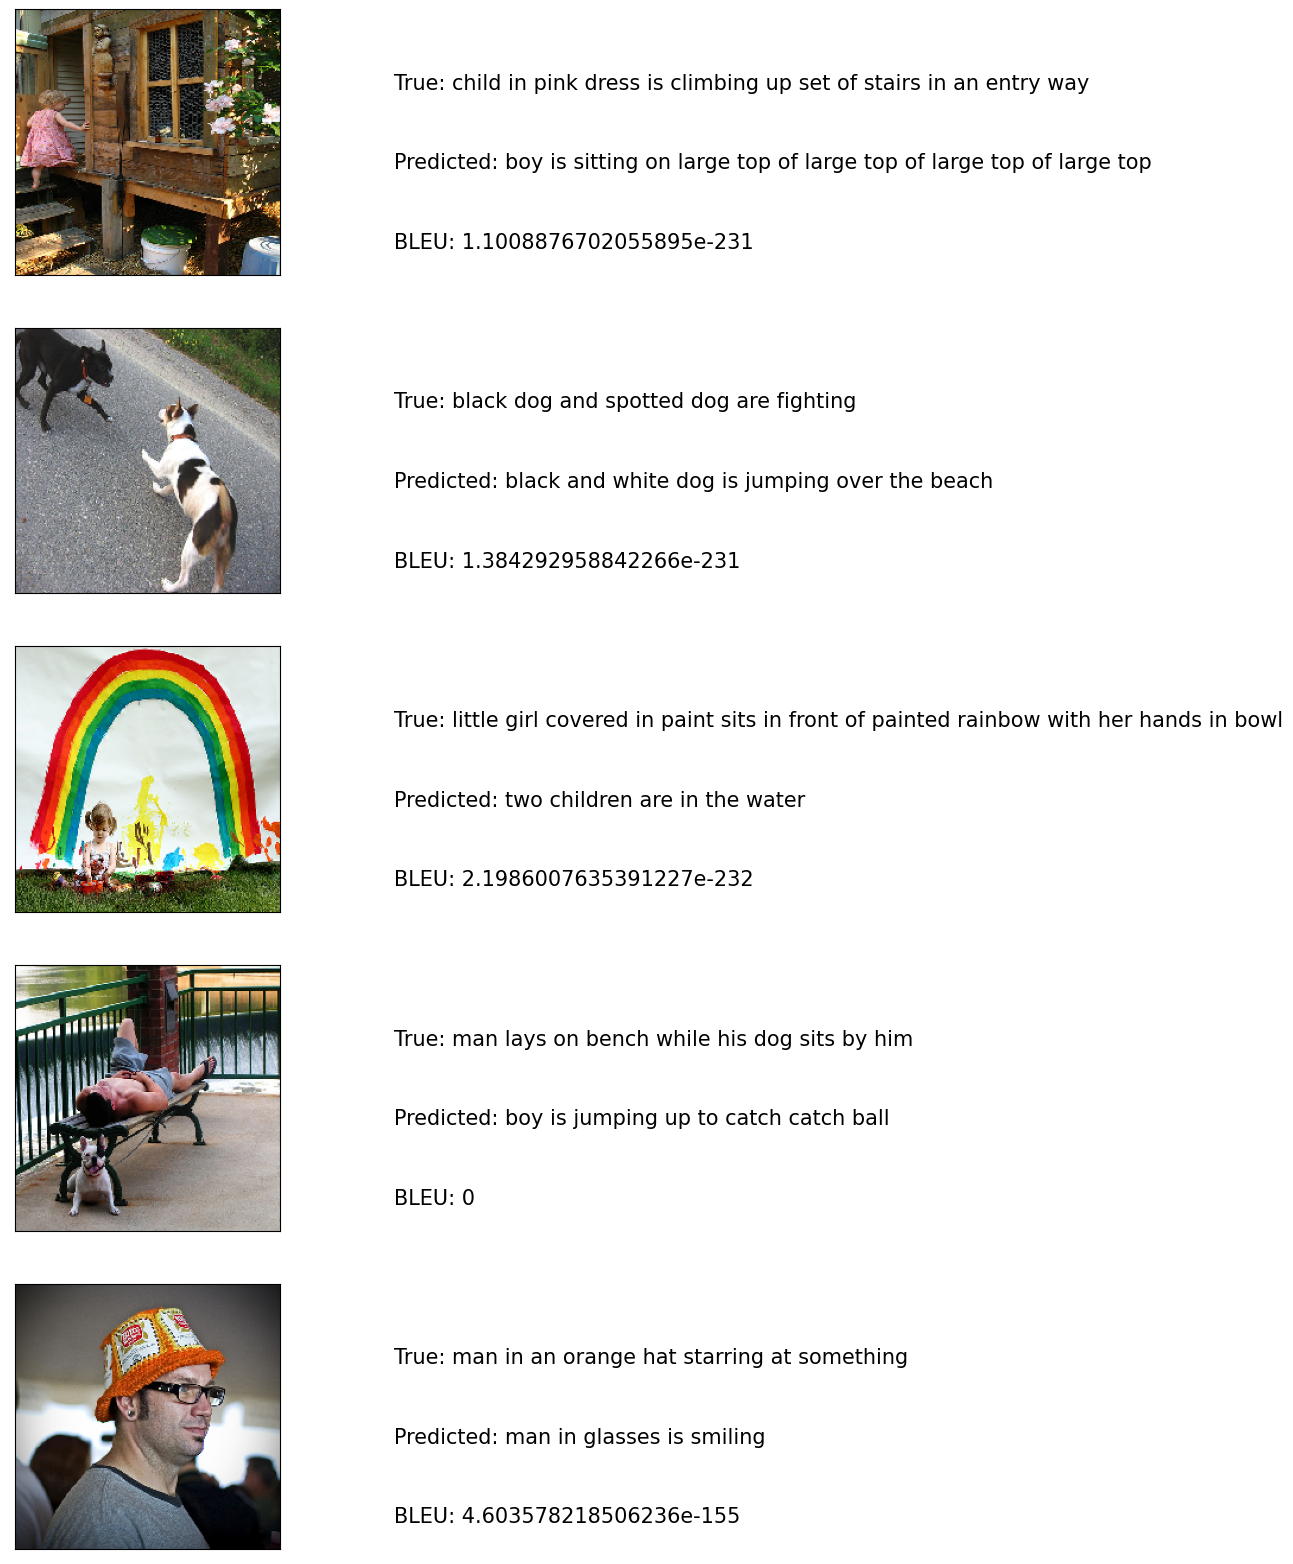

Captions corresponding to High-BLEU Score


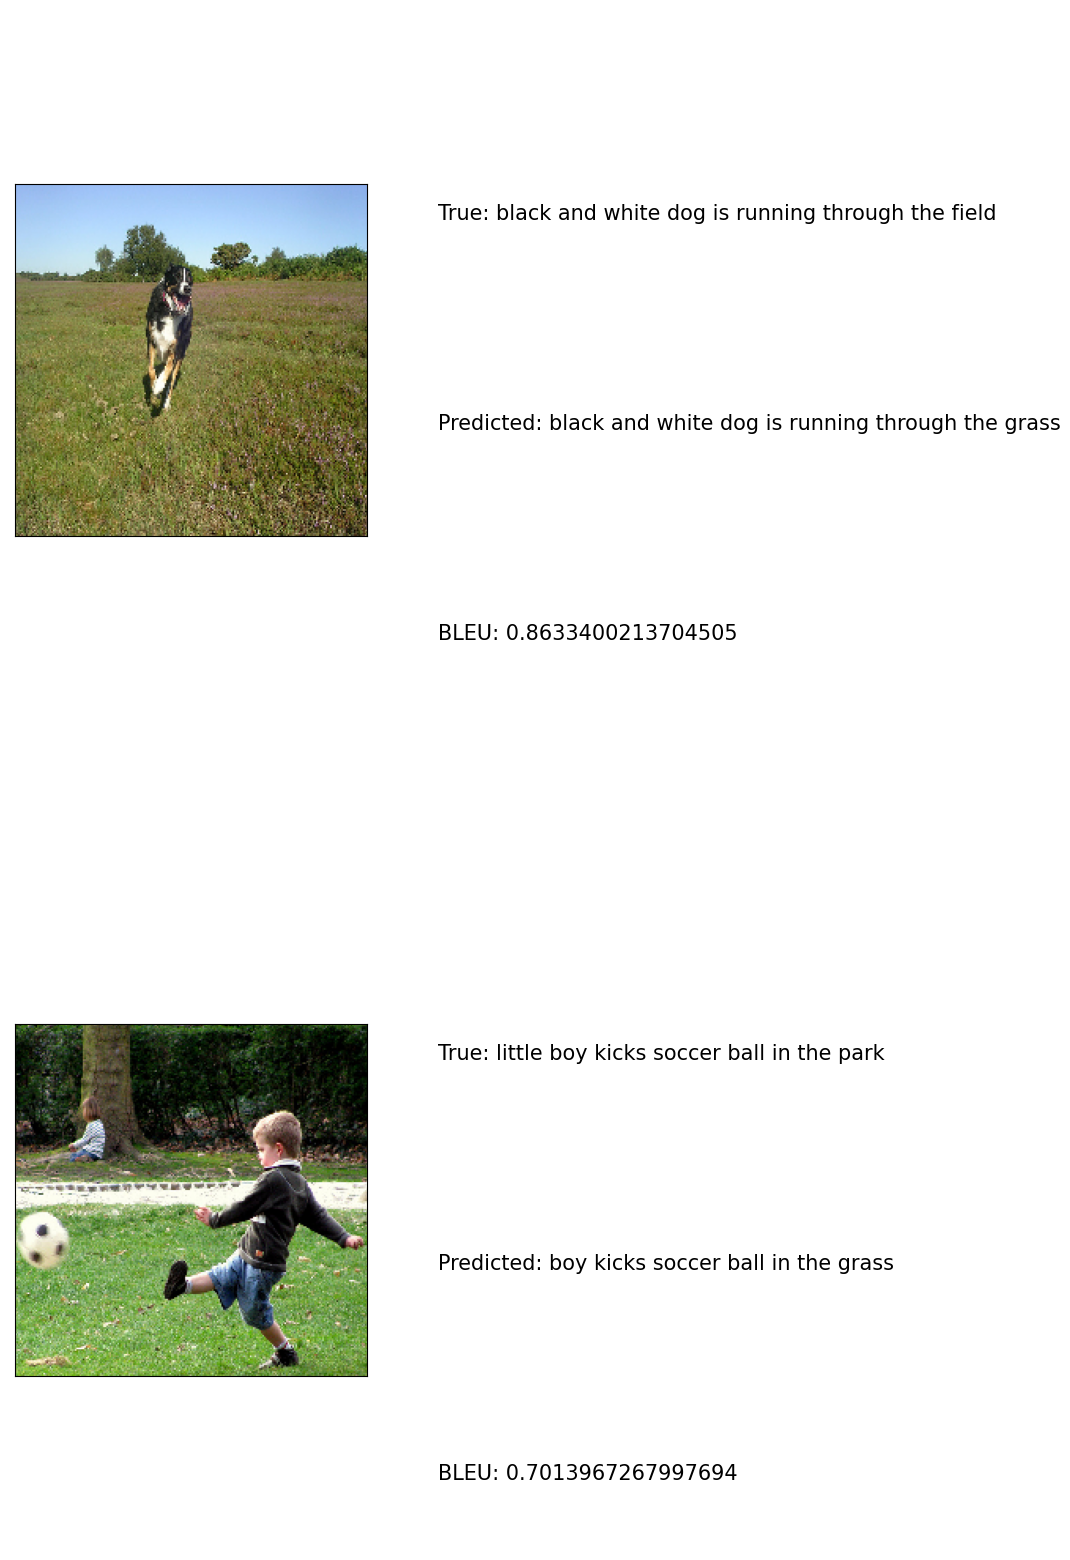

In [34]:
#15. Images with Low & High BLEU Score in Test Set
def plot_images(pred_bad):
    def create_str(caption_true):
        strue = ""
        for s in caption_true:
            strue += " " + s
        return(strue)
    npix = 224
    target_size = (npix,npix,3)    
    count = 1
    
    fig = plt.figure(figsize=(10,20))
    npic = len(pred_bad)
    for pb in pred_bad:
        bleu,jpgfnm,caption_true,caption = pb
        filename = Flickr_jpg_dir + '/' + jpgfnm
        image_load = load_img(filename, target_size=target_size)
        ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
        ax.imshow(image_load)
        count += 1
        caption_true = create_str(caption_true)
        caption = create_str(caption)
        
        ax = fig.add_subplot(npic,2,count)
        plt.axis('off')
        ax.plot()
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.text(0,0.7,"True:" + caption_true,fontsize=15)
        ax.text(0,0.4,"Predicted:" + caption,fontsize=15)
        ax.text(0,0.1,"BLEU: {}".format(bleu),fontsize=15)
        count += 1
    plt.show()

print("Captions corresponding to Low-BLEU Score")
plot_images(pred_bad)
print("Captions corresponding to High-BLEU Score")
plot_images(pred_good)

1/1 [==============================] - 0s 163ms/step


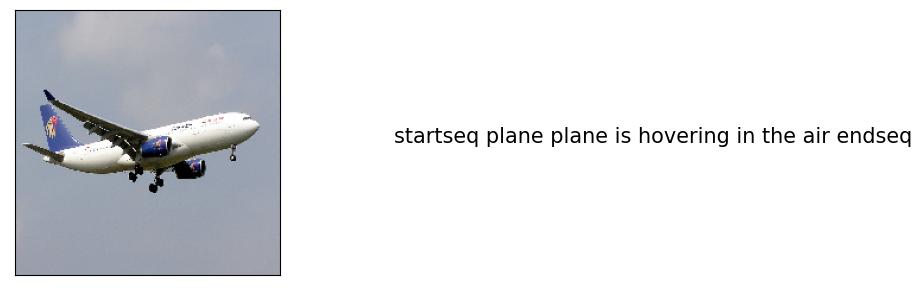

1/1 [==============================] - 0s 146ms/step


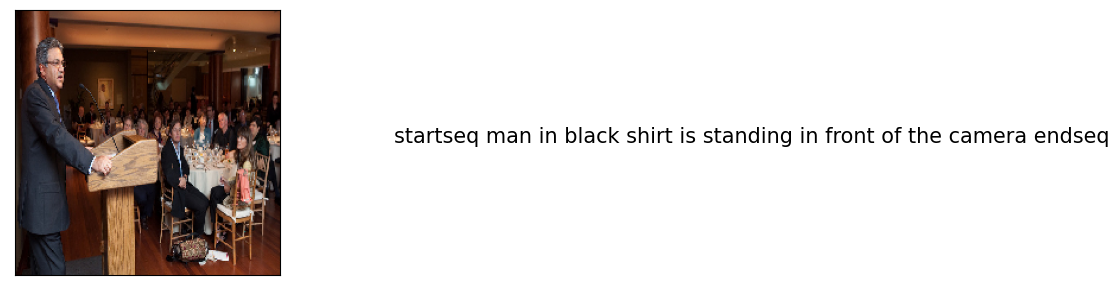

1/1 [==============================] - 0s 147ms/step


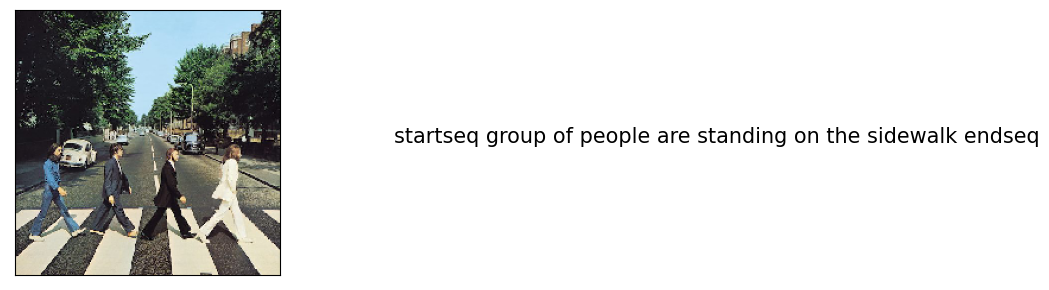

1/1 [==============================] - 0s 145ms/step


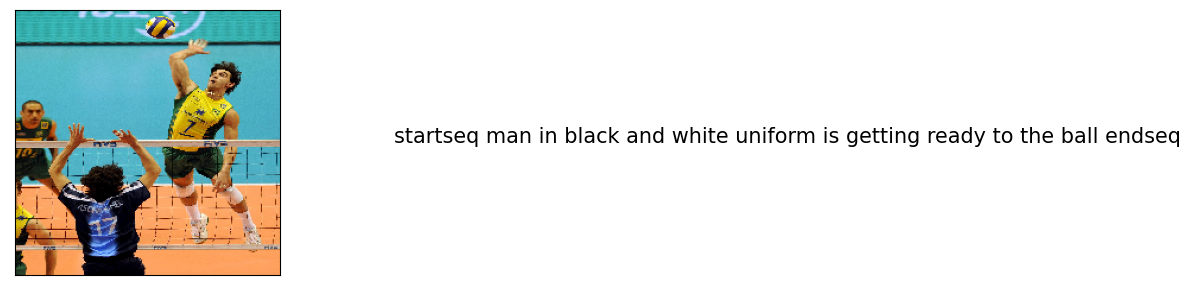

1/1 [==============================] - 0s 144ms/step


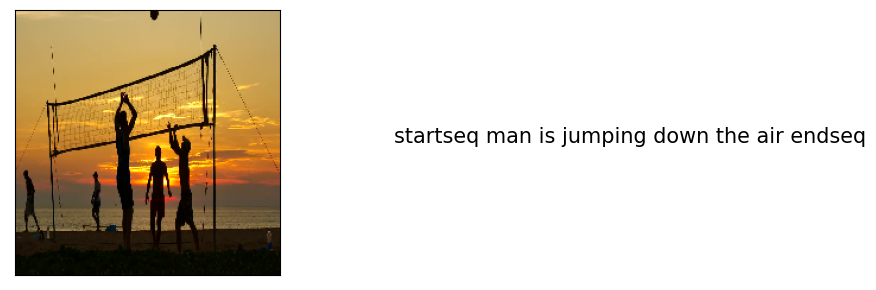

1/1 [==============================] - 0s 141ms/step


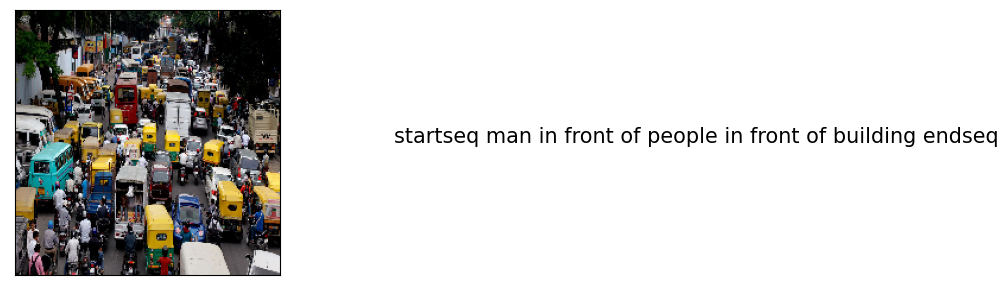

1/1 [==============================] - 0s 138ms/step


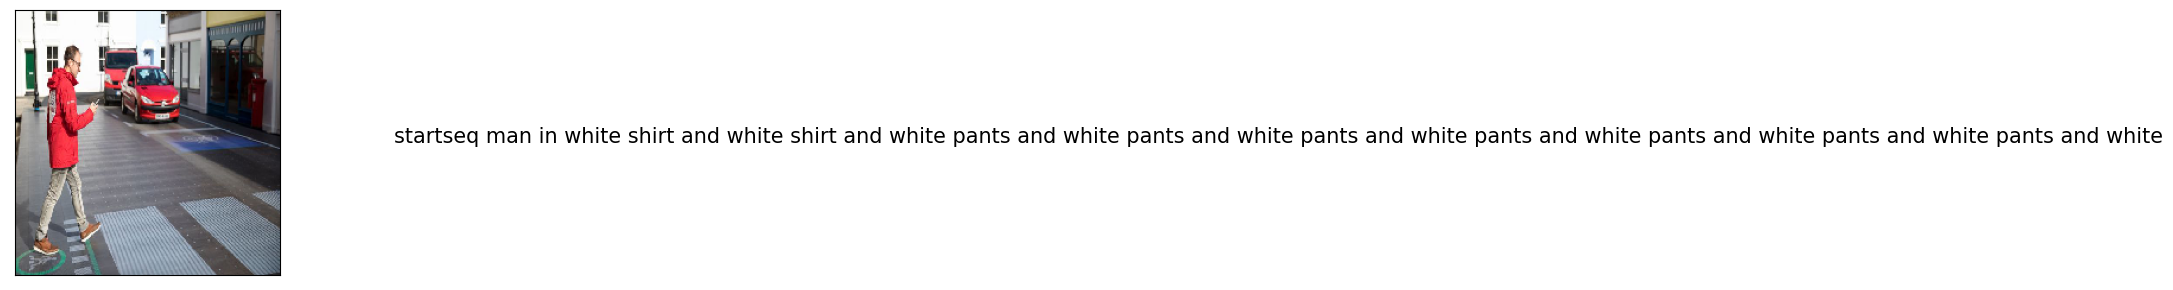

1/1 [==============================] - 0s 144ms/step


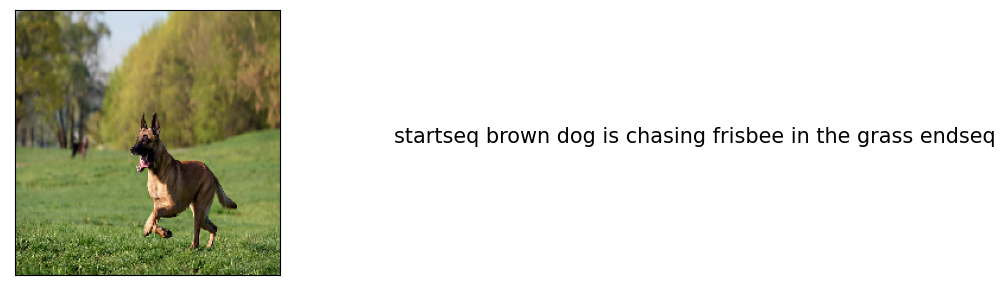

In [36]:
def Aiding_Visually_Impaired(filename):
       
    def predict_caption(image):
        '''
        image.shape = (1,4462)
        '''

        in_text = 'startseq'
        for iword in range(maxlen):
            sequence = tokenizer.texts_to_sequences([in_text])[0]
            sequence = pad_sequences([sequence],maxlen)
            yhat = model.predict([image,sequence],verbose=0)
            yhat = np.argmax(yhat)
            newword = index_word[yhat]
            in_text += " " + newword
            if newword == "endseq":
                break
        return(in_text)

    npic = 5
    npix = 224
    target_size = (npix,npix,3)
    count = 1
    fig = plt.figure(figsize=(10,20))

    # Images 
    image = load_img(filename, target_size=target_size)
    image = img_to_array(image)  # Convert the image pixels to a Numpy Array
    n_image = preprocess_input(image)
    Self_made_img = modelvgg.predict(n_image.reshape( (1,) + n_image.shape[:3])) 
    image_ = Self_made_img.flatten();
    
    image_load = load_img(filename, target_size=target_size)
    ax = fig.add_subplot(npic,2,count,xticks=[],yticks=[])
    ax.imshow(image_load)
    count += 1

    # Captions
    caption = predict_caption(image_.reshape(1,len(image_)))

    ax = fig.add_subplot(npic,2,count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.text(0,0.5,caption,fontsize=15)
    count += 1

    plt.show()
    
    
Aiding_Visually_Impaired('testset/Image_1.jpg')
Aiding_Visually_Impaired('testset/Image_2.jpg')
Aiding_Visually_Impaired('testset/Image_3.jpg')
Aiding_Visually_Impaired('testset/Image_4.jpg')
Aiding_Visually_Impaired('testset/Image_5.jpg')
Aiding_Visually_Impaired('testset/Image_6.jpeg')
Aiding_Visually_Impaired('testset/Image_8.jpg')
Aiding_Visually_Impaired('testset/Image_9.jpg')
